<h1 style="text-align:center;">Лабораторная работа №3</h1>

<h3 style="text-align:center;">Осипов Алексей Б01-204</h3>

**Цель**: Решить заданную НУ и СНУ  следующими методами:

1. Метод простой итерации 
2. Метод Ньютона

In [127]:
import numpy as np
import copy
import math
import matplotlib.pyplot as plt

Буду использовать свой метод Гаусса для решения СЛАУ (в методе Ньютона для СНУ) из второй лабы

In [79]:
# Вычисление 3й нормы вектора
def norm_3(U):
    r = 0
    for i in range(len(U)):
        r += U[i,0] * U[i,0]
        
    return np.sqrt(r)

# Поменять строки
def swap_rows(A, i, j):
    A[[i, j], :] = A[[j, i], :]

# Поменять столбцы
def swap_columns(A, i, j):
    A[:, [i, j]] = A[:, [j, i]]
    
#Функция для обмена значений
def swap(a,b):
    return b,a
    
# глобальный элемент А
def find_main_el(A, iter):
    size = A.shape[0]
    main_el = A[iter,iter]
    i_main = iter
    j_main = iter

    for i in range(size - iter): 
        for j in range(size - iter):
            if abs(A[i + iter,j + iter]) > abs(main_el):
                i_main = i + iter
                j_main = j + iter
                main_el = A[i_main,j_main]
    return [i_main, j_main]

def Gauss(a, f):
    
    A = copy.deepcopy(a)
    F = copy.deepcopy(f)
    
    size = len(A)  # размеры матрицы 
    
    X = np.arange(size) # Массив, чтобы запомнить порядок при смене строк и столбцов - пригодится в конце
    U  = np.ones((size, 1)) # массив решений
    result = np.ones((size, 1)) # Для ответа

    # Прямой ход
    for iter in range(size): 
        
        main_ind = find_main_el(A,iter) # Rоординаты главного элемента
        main_el = A[main_ind[0], main_ind[1]] # Сам главный элемент
        
        if(main_ind[0] - iter != 0): # Перестановка строк для главного элемента
            swap_rows(A[iter:, iter:], 0, main_ind[0] - iter)
            F[iter] = F[main_ind[0]] + F[iter]
            F[main_ind[0]] = F[iter] - F[main_ind[0]]
            F[iter] = F[iter] - F[main_ind[0]]
            
        if(main_ind[1] - iter != 0): # Перестановка столбцов для главного элемента
            swap_columns(A, iter, main_ind[1])
            # swap(X[iter], X[main_ind[1]])
            X[iter] = X[main_ind[1]] + X[iter]
            X[main_ind[1]] = X[iter] - X[main_ind[1]]
            X[iter] = X[iter] - X[main_ind[1]]
        
        A[iter:, iter:][0] =  A[iter:, iter:][0] / main_el
        F[iter] = F[iter] / main_el
        
        for i in range(size - iter - 1):
            F[iter + i + 1] -= (F[iter]  * A[iter:, iter:][i + 1][0])
            A[iter:, iter:][i + 1] -= (A[iter:, iter:][0] * A[iter:, iter:][i + 1][0])

    # Так как алгоритм не доходит до нижнего углового элемента, делаем его 1
    F[-1] /= A[-1, -1]
    A[size - 1, size - 1] = 1
    
    # Обратный ход
    for i in range(size-1, -1, -1):
        U[i] = F[i]
        for j in range(i + 1, size):
            U[i] -= U[j] * A[i][j]

    for i in range(size):
        result[int(X[i])][0] = U[i][0]

    return result

<h3 style="text-align:center;">Решение нелинейных уравнений</h3>

**1) Метод простой итерации для НУ**

**вариант к)** $x \cdot 2^x = 1$


In [84]:
def MPI(f, x0, epsilon):
    x = x0
    iter = 0
    while 1:
        fx = f(x)
        if abs(x - fx) < epsilon:
            return x, iter
        x = fx
        iter += 1

Посмотрим на сходимость МПИ для разных начальных приближений

Сначала зададим $f(x) = 2^{-x}$

In [88]:
def f(x):
    return 2**(-x)

epsilon = 1.0e-9
for i in range(-3, 6, 1): #Взял степени тройки для разных начальных приближений просто так, чтобы числа пострашнее были)
    x0 = 3 ** i
    mpi = MPI(f, x0, epsilon)
    x, iterations = mpi
    print("Тест", i+4, ":", "Начальное приближение = ", round(x0, 4), "Найденный корень = ", x, "Количество итераций = ", iterations)

Тест 1 : Начальное приближение =  0.037 Найденный корень =  0.6411857440233933 Количество итераций =  26
Тест 2 : Начальное приближение =  0.1111 Найденный корень =  0.6411857440887926 Количество итераций =  26
Тест 3 : Начальное приближение =  0.3333 Найденный корень =  0.6411857450233628 Количество итераций =  25
Тест 4 : Начальное приближение =  1 Найденный корень =  0.6411857439900768 Количество итераций =  25
Тест 5 : Начальное приближение =  3 Найденный корень =  0.6411857441008676 Количество итераций =  27
Тест 6 : Начальное приближение =  9 Найденный корень =  0.6411857439918438 Количество итераций =  27
Тест 7 : Начальное приближение =  27 Найденный корень =  0.6411857439900769 Количество итераций =  27
Тест 8 : Начальное приближение =  81 Найденный корень =  0.6411857439900768 Количество итераций =  27
Тест 9 : Начальное приближение =  243 Найденный корень =  0.6411857439900768 Количество итераций =  27


Теперь зададим $f(x) = \log_2\left(\frac{1}{x}\right)$

In [97]:
def f(x):          #Так как тут у нас x в знаменателе, нужно сделать проверку деления на 0
     try:
        if x <= 0:
            raise ZeroDivisionError("Делим на ноль")
        return math.log(1/x, 2)
     except ZeroDivisionError as e:
        return str(e)
epsilon = 1.0e-9
for i in range(-3, 6, 1):
    x0 = 3 ** i
    mpi = MPI(f, x0, epsilon)
    x, iterations = mpi
    print(x0, x, iterations)

Эта прога пишет ошибки, т.к. видимо где-то произошло деление на 0, значит мы вышли за область определения функции, значит этот сконструированный МПИ не подходит для поиска корня

**2) Метод Ньютона для НУ**

In [99]:
def Newton(f, df, x0, epsilon):
    x = x0
    for i in range(1000):
        dfx = df(x)
        if abs(dfx) < 1e-12:  # Проверка на нулевую производную
            print(f"Производная близка к нулю при x = {x}")
            return None, i
        x_new = x - f(x) / dfx
        if abs(x_new - x) < epsilon:
            return x_new, i
        x = x_new
    return x, i

Посмотрим на сходимость метода Ньютона для разных начальных приближений

In [102]:
def f(x):
    return x*2**x-1

def df(x):
    return (math.log(2)*x + 1)*(2**x)

epsilon = 1.0e-9
x0_nwt = []
iter_nwt = []
x0 = -1
while x0 < 5:
    nwt = Newton(f, df, x0, epsilon)
    if nwt[0] is not None:
        x, iterations = nwt[0], nwt[1]
        print("Начальное приближение = ", round(x0, 4), "Найденный корень = ", x, "Количество итераций = ", iterations)
    else:
        print("Не удалось найти корень для x0 =", round(x0, 4)) # Если поставить начальное приближение больше -1.4, тогда корень не найдётся
    x0 += 0.05                                                  # Я поставил такое, чтобы корни находились, и получился красивый график)
    x0_nwt.append(x0)
    iter_nwt.append(iterations)

Начальное приближение =  -1 Найденный корень =  0.641185744504986 Количество итераций =  13
Начальное приближение =  -0.95 Найденный корень =  0.641185744504986 Количество итераций =  12
Начальное приближение =  -0.9 Найденный корень =  0.641185744504986 Количество итераций =  11
Начальное приближение =  -0.85 Найденный корень =  0.641185744504986 Количество итераций =  10
Начальное приближение =  -0.8 Найденный корень =  0.641185744504986 Количество итераций =  10
Начальное приближение =  -0.75 Найденный корень =  0.641185744504986 Количество итераций =  9
Начальное приближение =  -0.7 Найденный корень =  0.641185744504986 Количество итераций =  9
Начальное приближение =  -0.65 Найденный корень =  0.641185744504986 Количество итераций =  8
Начальное приближение =  -0.6 Найденный корень =  0.641185744504986 Количество итераций =  8
Начальное приближение =  -0.55 Найденный корень =  0.641185744504986 Количество итераций =  7
Начальное приближение =  -0.5 Найденный корень =  0.6411857445

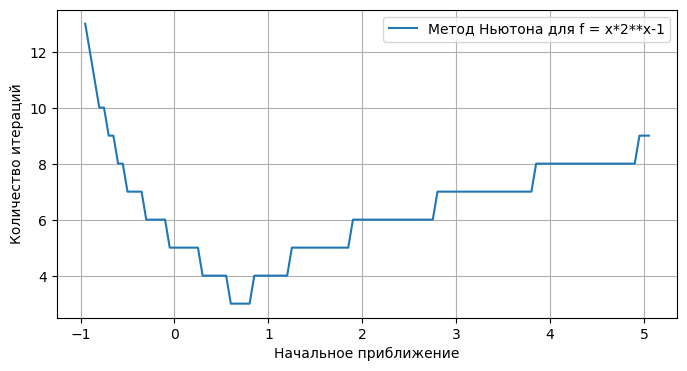

In [104]:
plt.figure(figsize = [8,4])

plt.plot(x0_nwt, iter_nwt, label = "Метод Ньютона для f = x*2**x-1")
plt.xlabel('Начальное приближение')
plt.ylabel('Количество итераций')
plt.legend()
plt.grid()
plt.show()

Получается, что чем ближе начальное приближение к искомому корню, тем меньше итераций - логично :)

<h3 style="text-align:center;">Решение систем нелинейных уравнений</h3>

**1) Метод простой итерации для СНУ**

**вариант в)** 
$$
\cos(x-1) + y = 0.5
$$
$$
x - \cos y = 3
$$

In [110]:
def MPI_SNU(fx, fy, x0, y0, epsilon=1e-6, max_iter = 100):
    x = x0
    y = y0
    iter = 0

    while iter < max_iter:
        try:
            f_x = fx(x, y)
            f_y = fy(x)
            
            # Критерий остановки
            if (abs(x - f_x) < epsilon) and (abs(y - f_y) < epsilon):
                return x, y, iter 
                
            x = f_x
            y = f_y
        
        except ValueError as e:
            print(f"Ошибка на итерации {iter + 1}: {e}")
            break
        
        iter += 1
    
    print("Превышено максимально допустимое количество итераций.")
    return x, y, iter


In [112]:
def fx(x, y):
    return np.cos(y) + 3

def fy(x):
    return 0.5 - np.cos(x-1)

In [114]:
epsilon = 1e-6
x_snu = []
y_snu = []
iter_snu = []
x0 = 0
y0 = -2
for i in range(10):
    x_root, y_root, iterations = MPI_SNU(fx, fy, x0, y0, epsilon, 1000)
    x_snu.append(x0)
    y_snu.append(y0)
    iter_snu.append(iterations)
    print("Начальное приближение:", "x0 = ", round(x0, 1), "y0 = ", round(y0, 1))
    print("Найденные корни:", "x = ", x_root, "y = ", y_root, "Количество итераций = ", iterations)
    print()
    x0 += 0.2
    y0 += 0.2

Начальное приближение: x0 =  0 y0 =  -2
Найденные корни: x =  3.355911257980035 y =  1.2069072863836394 Количество итераций =  68

Начальное приближение: x0 =  0.2 y0 =  -1.8
Найденные корни: x =  3.355911262476491 y =  1.2069072257146085 Количество итераций =  68

Начальное приближение: x0 =  0.4 y0 =  -1.6
Найденные корни: x =  3.355912445154047 y =  1.2069063602134864 Количество итераций =  66

Начальное приближение: x0 =  0.6 y0 =  -1.4
Найденные корни: x =  3.355912427114542 y =  1.2069065834764816 Количество итераций =  66

Начальное приближение: x0 =  0.8 y0 =  -1.2
Найденные корни: x =  3.3559117501763707 y =  1.2069060973145054 Количество итераций =  65

Начальное приближение: x0 =  1.0 y0 =  -1.0
Найденные корни: x =  3.3559120420848094 y =  1.2069061037175683 Количество итераций =  65

Начальное приближение: x0 =  1.2 y0 =  -0.8
Найденные корни: x =  3.3559114033828124 y =  1.2069072935631922 Количество итераций =  67

Начальное приближение: x0 =  1.4 y0 =  -0.6
Найденные ко

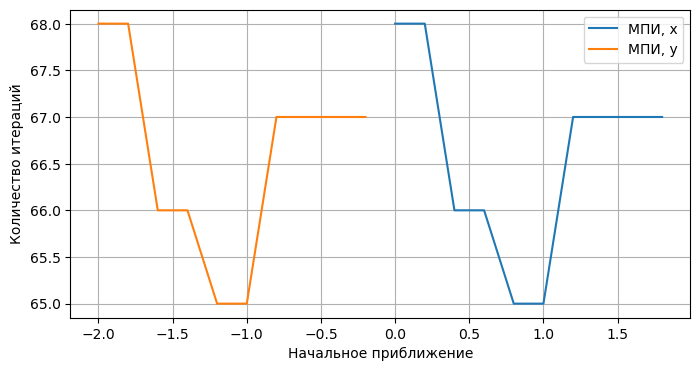

In [116]:
plt.figure(figsize = [8,4])

plt.plot(x_snu, iter_snu, label = "МПИ, x")
plt.plot(y_snu, iter_snu, label = "МПИ, y")
plt.xlabel('Начальное приближение')
plt.ylabel('Количество итераций')
plt.legend()
plt.grid()
plt.show()

Вот графики моих уравнений

<img src="lab3_1.jpg" alt="drawing" width="1000"/>

**2) Метод Ньютона для СНУ**

In [121]:
def Newton_SNU(f1, f2, J, x0, y0, epsilon=1e-6, max_iter=100, lambda_=0.5):
    x, y = x0, y0
    
    for iter_count in range(max_iter):
        F = np.array([f1(x, y), f2(x, y)])
        delta = Gauss(J(x, y), F) # Мой Гаусс
        
        x_new = x - lambda_ * delta[0][0]  # [0][0] - это первый элемент в столбце
        y_new = y - lambda_ * delta[1][0]  # [1][0] - это второй элемент в столбце
        
        if np.sqrt((x_new - x)**2 + (y_new - y)**2) < epsilon:
            return x_new, y_new, iter_count + 1
        
        x, y = x_new, y_new
    return x, y, iter_count + 1

In [129]:
def f1(x, y):
    return np.cos(y) + 3 - x 

def f2(x, y):
    return 0.5 - np.cos(x-1) - y

def J(x, y):        # Якобиан
    return np.array([
        [-1, -np.sin(y)],
        [np.sin(x-1), -1]
    ])

In [195]:
epsilon = 1e-6
x_snu = []
y_snu = []
iter_snu = []
x0 = 2
y0 = 0
for i in range(15):
    x_root, y_root, iterations = Newton_SNU(f1, f2, J, x0, y0)
    x_snu.append(x0)
    y_snu.append(y0)
    iter_snu.append(iterations)
    print("Начальное приближение:", "x0 = ", round(x0, 1), "y0 = ", round(y0, 1))
    print("Найденные корни:", "x = ", x_root, "y = ", y_root, "Количество итераций = ", iterations)
    print()
    x0 += 0.2
    y0 += 0.2

Начальное приближение: x0 =  2 y0 =  0
Найденные корни: x =  3.3559110691234832 y =  1.2069062291971713 Количество итераций =  20

Начальное приближение: x0 =  2.2 y0 =  0.2
Найденные корни: x =  3.355910942723367 y =  1.2069063308171053 Количество итераций =  20

Начальное приближение: x0 =  2.4 y0 =  0.4
Найденные корни: x =  3.355910933289661 y =  1.2069063990305404 Количество итераций =  20

Начальное приближение: x0 =  2.6 y0 =  0.6
Найденные корни: x =  3.35591102048726 y =  1.2069064677838293 Количество итераций =  20

Начальное приближение: x0 =  2.8 y0 =  0.8
Найденные корни: x =  3.3559111753627198 y =  1.206906555021073 Количество итераций =  20

Начальное приближение: x0 =  3.0 y0 =  1.0
Найденные корни: x =  3.3559110023711423 y =  1.206906523580073 Количество итераций =  19

Начальное приближение: x0 =  3.2 y0 =  1.2
Найденные корни: x =  3.3559111098748384 y =  1.2069068278483333 Количество итераций =  18

Начальное приближение: x0 =  3.4 y0 =  1.4
Найденные корни: x =  

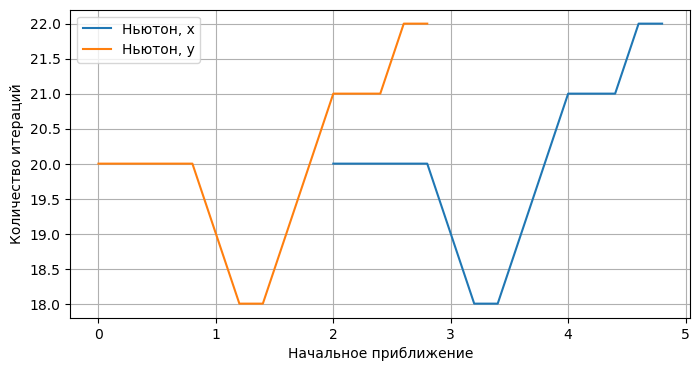

In [197]:
plt.figure(figsize = [8,4])

plt.plot(x_snu, iter_snu, label = "Ньютон, x")
plt.plot(y_snu, iter_snu, label = "Ньютон, y")
plt.xlabel('Начальное приближение')
plt.ylabel('Количество итераций')
plt.legend()
plt.grid()
plt.show()

Тут как и везде - чем ближе начальное приближение к корню, тем меньше итераций

 Собственный Гаусс отработал на ура &#x1F60E;